<a href="https://colab.research.google.com/github/gscott02/351-Python/blob/main/Plotting_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Functions

This activity will use Pyplot from the package matplotlib to create figures using gas laws for context. It will also make use of the package numpy, a powerful set of tools for numerical computation. In addition to this tutorial, you can find detailed documentation for these packages at the following locations:

https://matplotlib.org/stable/tutorials/pyplot.html

https://numpy.org/

We will start by importing the required packages.

In [ ]:
import matplotlib.pyplot as plt   # Note that we gave pyplot an alias, so we will refer to it using the name plt
import numpy as np                # The same goes for numpy. We will refer to numpy as np for short.

## Basic numpy package use.

Numpy has many useful math tools such as an exponential function. We can use it with the notation `np.exp()`. For example, if we wanted to compute $e^{-x}$, we would write `np.exp(-x)`. Let's try it (make sure you ran the cell above that imports the numpy packages before you run the cell below or you'll get an error!). Numpy has a lot of other functions you can use and you'll refer to them all by putting np.function_name

In [ ]:
x = 1                # We could have called this anything; x was just a random selection
answer = np.exp(x)   # We also could have just done np.exp(1) directly without storing 1 in the variable x
print(answer)

2.718281828459045


Now you try the square root function. Notice it's not native in Python, so you need a package like numpy. The function name in numpy is sqrt. See if you can correct the following to make it work:

In [ ]:
# Fix me!
sqrt(4)

NameError: ignored

## Basic Plotting with Pyplot
Matplotlib's pyplot module makes it easy to make  plots. The most basic plot we can make is a line plot of y as a function of x:

`plt.plot(x, y)`   

To make it a scatter plot, we can specify the data marker:   
`plt.plot(x,y,'o')`   

In this case, 'o' means circular markers.  Many other markers are available, such as 'd' for diamond and 's' for square. You can see the full list here: https://matplotlib.org/stable/api/markers_api.html

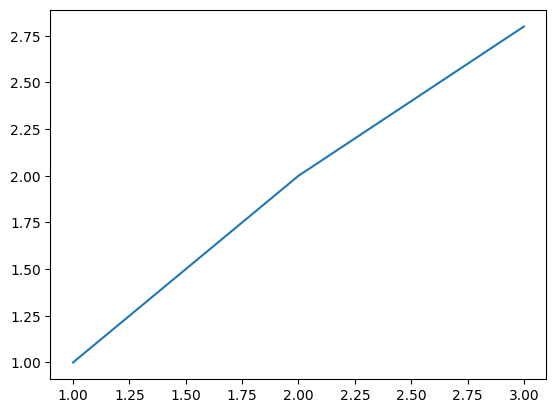

In [ ]:
xdata = np.array([1, 2, 3])      # This creates an array of data in numpy
ydata = np.array([1, 2., 2.8])
plt.plot(xdata,ydata)  # Fix me!
# Notice that by default, this plot "connects the dots," which you probably don't want for sparse data.
# Add the 'o' to the plot call to turn it into a scatter plot. Try some other markers like 'x' as well.

## Creating Arrays for Plotting
NumPy's linspace function allows us to create a range of evenly spaced values over a specified interval. For example, we can create an array of 100 values from 0 to 2π:

`x = np.linspace(0, 2 * np.pi, 100)`

We can use these x values to create another array for y. For example, we might want y to be the sine of x:

`y = np.sin(x)`

This command makes an array named y that contains the sine of the values in the array x.

The following example shows you what linspace creates.

Note that you may also see code that uses `np.arrange`. This works similarly to linspace, but lets you choose the interval between the points rather than the number of points. For example, `np.arrange(0,5,0.1)` would create as many points as needed to get from 0 to 5 with a step size of 0.1.

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


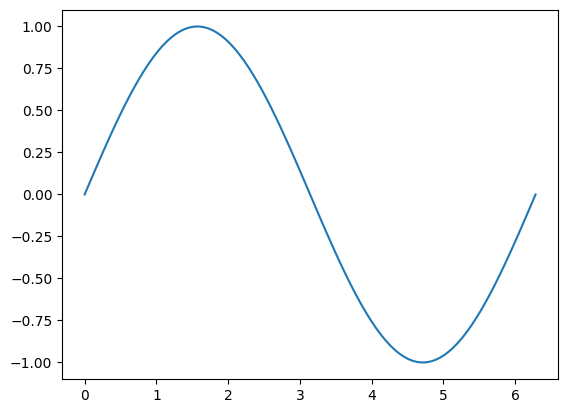

In [ ]:
x1 = np.linspace(0,5,11) # Create 11 points evenly spaced from 0 to 5
print(x1) # Display the x1 array
y1 = 2*x1 # You can create a new array doing math on them. This will multiply each value in the x1 array by 2 and store the result in y1.
print(y1) # Display the y1 array. Note that it's double the x1 array. Try changing the formula for y1.

# Let's use it to plot something interesting
x2 = np.linspace(0, 2 * np.pi, 100)
y2 = np.sin(x)
plt.plot(x2,y2,'-') # Here we have dense, quasi-continuous data, so it makes sense to plot it as a smooth curve rather than with markers.

As a more interesting example, let's plot the vibration in a car after it hits a pothole.  The car's springs will begin to oscillate, but this oscillation will be dampened by the shock absorbers.  In our example the shock absorbers are a bit worn out.  The amplitude of the vibration can be modeled with the following equation:    
$y=A \ cos(t \  k_1)e^{-k_2 t}$

Text(0, 0.5, 'Vertical Displacement  (cm)')

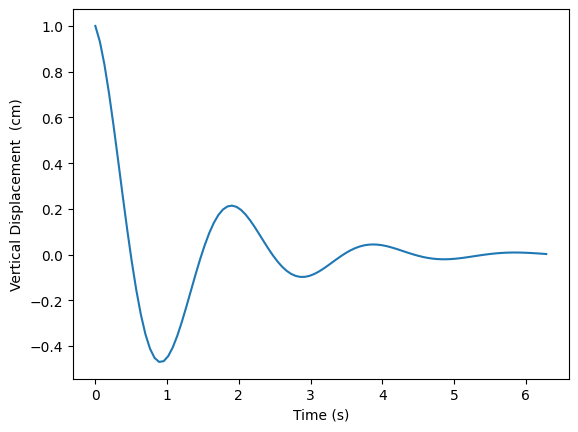

In [ ]:
# Always comment your code with the units of the constants you use.
k1=4                            #1/s
k2=1                            # 1/s
A=5                             # cm
t = np.linspace(0, 5, 100)
y=np.cos(k1*t)*np.exp(-k2* t)   # note the syntax for the exponential operation
plt.plot(x,y,'-')

# It's easy to add x and y labels!
plt.xlabel('Time (s)')                # Remember to include units on axis labels
plt.ylabel(r'Vertical Displacement  (cm)')

## Plotting Multiple Series on the Same Figure

Adding more than one data series to the same figure is as easy as adding additional plot calls. Looking at the two lines below, both y1 and y2 will be plotted against x on the same figure.

```
plt.plot(x,y1,'-')  # solid line
plt.plot(x,y2,'--') # dashed line
```

Pyplot will choose different colors for you automatically (though you can also tell it what color you want: https://matplotlib.org/stable/users/explain/colors/colors.html), but in most cases it's good practice to use different symbols and not just different colors. You already know how to include different markers, but you can do different line styles as well. Some useful ones to know are `'-'`, `'--'`, `'-.'`, `':'`. Full documentation: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

When plotting multiple data series, you probably want to add a legend. To do this, you can add a label to the plot call and then call `plt.legend()`. See the example below.

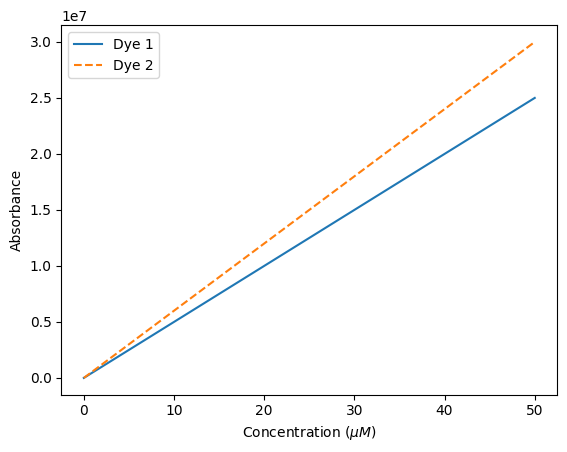

In [ ]:
epsilon1 = 5e5 # M^-1*cm^-1
epsilon2 = 6e5 # M^-1*cm^-1
b = 1         # cm

c = np.linspace(0,50, 100)  # micromolar

A1 = epsilon1*b*c
A2 = epsilon2*b*c

plt.plot(c, A1,'-', label='Dye 1')
plt.plot(c, A2,'--', label='Dye 2')

plt.xlabel(r'Concentration ($\mu M$)')  # Wow, a Greek letter! See the next section to learn more.
plt.ylabel('Absorbance')
plt.legend()

## Using Greek Letters and Other Math in Labels

Sometimes you need to use Greek letters or other typesetting in your axes labels. You can use MathJax to do so, but you may need to include the character r at the start of the label (you can sometimes get away without the r, but you will also sometimes get an error. Prepending the string with r makes it a "raw string" in Python, which lets you use \ characters without problems).

`plt.xlabel(r'Concentration ($\mu M$)')`

A few handy things to know:

- Use Greek letters by using a backslash and their name, e.g. `\delta` for lowercase $\delta$ or `\Delta` for uppercase $\Delta$.
- Superscripts: `x^{-1}` for $x^{-1}$
- Subscripts: `V_{m}` for $V_m$
- Standard state symbol: `\circ` for $\circ$. Combine it with a superscript: `\Delta H^{\circ}` for $\Delta H^{\circ}$

There is a lot more you can if you're interested: https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference

# Practice

## Practice 1

Plot isotherms of the pressure as a function of molar volume for a perfect gas at three different temperatures. Add axis labels, use different line styles for your three different temperatures, and include a legend indicating the temperature. Plot from $V_m$=0 (or something close to it; you can't divide by zero) to 1 L/mol.

In [ ]:
# Write your code here!

## Practice 2

Pick a gas from the following list: https://en.wikipedia.org/wiki/Van_der_Waals_constants_(data_page)

**Important note:** Pay attention to the units in the data table. Make sure you use the gas constant, $R$, with the correct units (or convert the units on $a$).

Plot isotherms of the pressure as a function of molar volume using the van der Waals equation. Plot from $V_m$=0 (or something close to it; you can't divide by zero) to 1 L/mol. Plot at four temperatures:

*   Two temperatures below $T_c$
*   At the critical temperature, $T_c$
*   One temperatures above $T_c$

You should solve for $T_c$ (use Python!) before you start plotting. We solved for $T_c$ as a function of $a$ and $b$ in the symbolic math exercises, but you can also look up the solution in your text.

**Important note:** matplotlib will automatically scale your y-axis to fit in all of the data generated. Because the van der Waals equation has asymptotic behavior and will generate nonsense pressures (below zero), you will want to limit your y-axis to something reasonable when it's displayed using `plt.ylim(bottom, top)`. Replace bottom and top with reasonable values, e.g. `plt.ylim(0,120)`

In [ ]:
# Write your code here!